In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
df=pd.read_csv('C:/Users/Lenovo/Desktop/Ram_Perceptrons/student.csv')
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [3]:
df.describe()

,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [4]:
df.skew()

Math      -0.187851
Reading   -0.246671
Writing   -0.250778
dtype: float64

In [5]:
df.kurt()

Math      -0.139621
Reading   -0.120872
Writing   -0.143788
dtype: float64

## Plotting graph for viewing the data

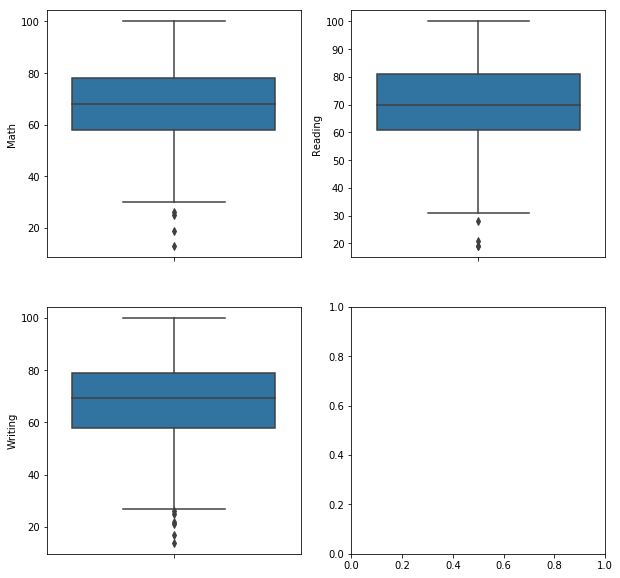

In [6]:
f,axes=plt.subplots(2,2,figsize=(10,10))
sb.boxplot(y=df['Math'],ax=axes[0,0])
sb.boxplot(y=df['Reading'],ax=axes[0,1])
sb.boxplot(y=df['Writing'],ax=axes[1,0])

## Relation between Math and Writing

0.8011595965718689


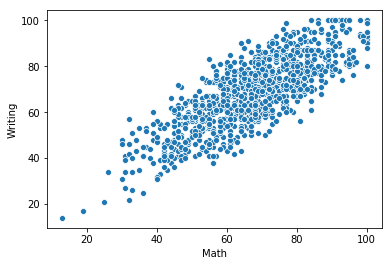

In [7]:
print(np.corrcoef(df['Math'],df['Writing'])[0,1])
sb.scatterplot(df['Math'],df['Writing'])

## Relation between Reading and Writing

0.9522256981148811


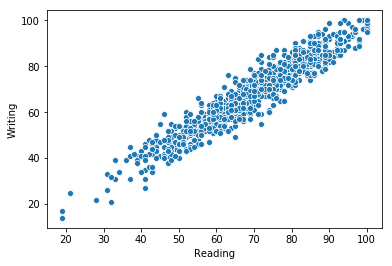

In [8]:
print(np.corrcoef(df['Reading'],df['Writing'])[0,1])
sb.scatterplot(df['Reading'],df['Writing'])

# Variation Inflation Factor

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [10]:
d1=add_constant(df)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
pd.Series([variance_inflation_factor(d1.values,i)
          for i in range(d1.shape[1])],index=d1.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64

## Splitting dependent and independent variables

In [12]:
X=df.iloc[:,:-1].values
y=df.iloc[:,2]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Machine Learning

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
linearmodel=LinearRegression()

In [16]:
linearmodel.fit(X_train,y_train)
linearmodel.score(X_train,y_train)

0.9079078752572451

In [17]:
y_pred1=linearmodel.predict(X_train  )
y_pred=linearmodel.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_train,y_pred1))

In [18]:
print(r2)
rmse

0.9144468972691792


4.558981078052662

# BACKWARD ELIMINTION

In [19]:
import statsmodels.formula.api as sm

In [20]:
X=np.append(arr=np.ones((1000,1)).astype(int),values=X,axis=1)

In [21]:
X_opt=X[:,[0,1,2]]

In [22]:
Ols=sm.OLS(endog=y,exog=X_opt).fit()
Ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Writing   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5034.
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:38:07   Log-Likelihood:                -2939.1
No. Observations:                1000   AIC:                             5884.
Df Residuals:                     997   BIC:                             5899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4624      0.722     -2.026      0.043      -2.879      -0.046
x1             0.0960      0.016      5.910      0.000       0.064       0.128
x2             0.9105      0.017     54.457      0.000       0.878       0.943
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.537
Skew:                          -0.001   Prob(JB):                        0.765
Kurtosis:                       3.113   Cond. No.                         494.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""